## 2. 이상치 처리

### 이상치 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

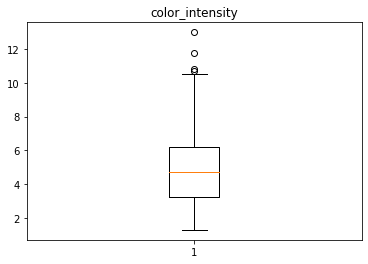

In [2]:
import matplotlib.pyplot as plt

plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [3]:
import numpy as np

def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

In [4]:
outliers = outliers_iqr(wine,'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [5]:
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [6]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

## 3. 범주형 변수 처리

In [7]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [8]:
iris_dummy = pd.get_dummies(iris, columns = ['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 4. 데이터 분할

In [9]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2)
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [11]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
86,6.7,3.1,4.7,1.5
71,6.1,2.8,4.0,1.3
116,6.5,3.0,5.5,1.8


In [12]:
y_train.head(3)

86     Versicolour
71     Versicolour
116      Virginica
Name: Class, dtype: object

In [13]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [14]:
y_train.value_counts()

Versicolour    45
Virginica      40
Setosa         35
Name: Class, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2, stratify =iris['Class'])
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [16]:
y_train.value_counts()

Setosa         40
Virginica      40
Versicolour    40
Name: Class, dtype: int64

## 5. 데이터 스케일링

### Standard Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

StdScaler = StandardScaler()

# Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.04, 3.07) (-0.00, 1.00)
Test_scaled (-2.50, 2.26) (-0.09, 1.02)


### Min-Max Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.44, 0.27)
Test_scaled (-0.09, 1.04) (0.42, 0.27)


### Max Abs Scaler

In [19]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MaScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.24)
Test_scaled (0.08, 1.03) (0.61, 0.24)


### Robust Scaler

In [20]:
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-1.52, 2.67) (-0.01, 0.64)
Test_scaled (-1.90, 1.52) (-0.08, 0.65)


### 원본 스케일로 변경

In [21]:
pd.DataFrame(X_train_sc).head(3)

,0,1,2,3
0,-0.461538,0.952381,-0.822695,-0.733333
1,1.076923,1.142857,0.482270,0.800000
2,-0.076923,-0.952381,0.170213,0.466667


In [22]:
X_Original = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,5.2,3.5,1.5,0.2
1,7.2,3.6,6.1,2.5
2,5.7,2.5,5.0,2.0


## 주성분 분석

In [23]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [24]:
# 수치형 데이터만 추출
features = ['수치형변수1', '수치형변수2']
x = iris.drop(columns = 'Class')

# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [25]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 4) 
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


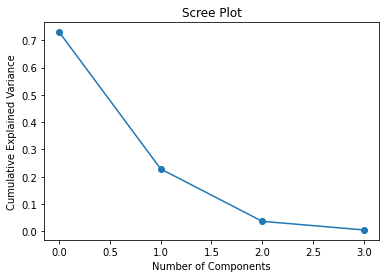

In [26]:
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [27]:
pca = PCA(n_components = 2)                        # PCA 객체 생성 (주성분 갯수 2개 생성)
principalComponents = pca.fit_transform(x)     # 2개의 주성분을 가진 데이터로 변환
principal_iris = pd.DataFrame(data = principalComponents, columns =['pc1', 'pc2']) 
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


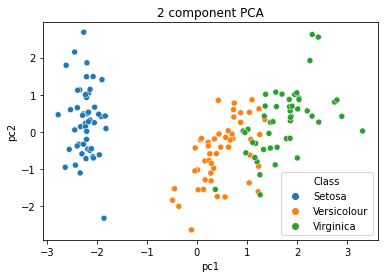

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 component PCA' )
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris.Class,  data = principal_iris)
plt.show()

## 불균형 처리

In [39]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


### 언더 샘플링

In [40]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [43]:
undersample = RandomUnderSampler(sampling_strategy=0.5) 
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


### 오버 샘플링
RandomOverSampler

In [45]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5) 
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [49]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

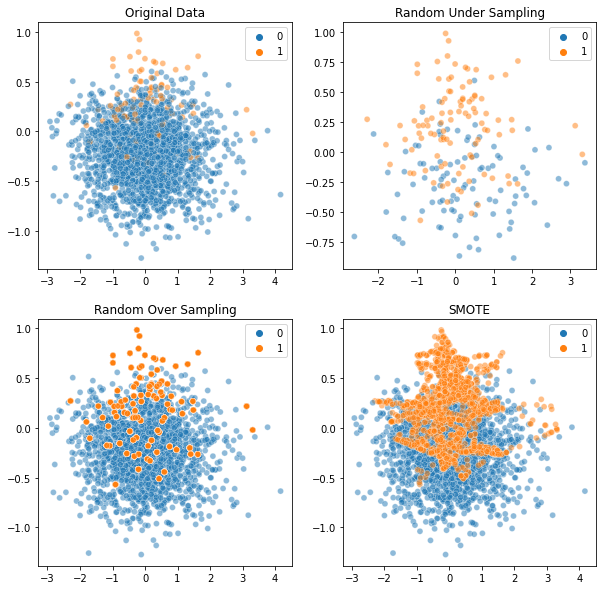

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(x[:, 1], x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x_under[:, 1], x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x_over[:, 1], x_over[:, 2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x_sm[:, 1], x_sm[:, 2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()